In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('training_mush.csv')
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [16]:
y = df['class']

In [17]:
X = df.drop('class', axis=1)

In [4]:
clf_rf = RandomForestClassifier(random_state=0)

In [6]:
parametrs = {'n_estimators': range(10, 60, 10), 
             'max_depth': range(1, 13, 2), 
             'min_samples_leaf': range(1, 8), 
             'min_samples_split': range(2, 10, 2)}

In [7]:
search = GridSearchCV(clf_rf, parametrs, cv=3, n_jobs=-1)

In [18]:
search.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max

In [22]:
search.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [23]:
best_clf_rf = search.best_estimator_

In [24]:
best_clf_rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [27]:
feature_importances_df = pd.DataFrame({'features': list(X),
                                       'feature_importances': best_clf_rf.feature_importances_})

In [29]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


In [30]:
df_test = pd.read_csv('testing_mush.csv')
df_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [31]:
y_pred = best_clf_rf.predict(df_test)

In [52]:
df_t = pd.DataFrame(y_pred)

In [57]:
df_t[0].value_counts()

0    1055
1     976
Name: 0, dtype: int64

In [59]:
df_true = pd.read_csv('testing_y_mush.csv')
df_true.head()

,class
0,0
1,0
2,1
3,1
4,1


In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
confusion_matrix(df_true, y_pred)

array([[1055,    0],
       [   0,  976]])

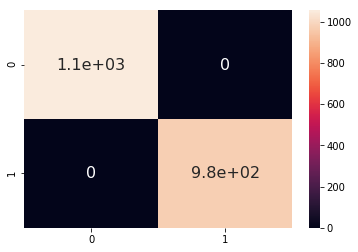

In [64]:
sns.heatmap(confusion_matrix(df_true, y_pred), annot=True,annot_kws={"size": 16});

In [65]:
df_invasion = pd.read_csv('invasion.csv')
df_invasion.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [66]:
df_operative_info = pd.read_csv('operative_information.csv')
df_operative_info.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [68]:
df_invasion['class'].unique()

array(['transport', 'fighter', 'cruiser'], dtype=object)

In [70]:
df_invasion = df_invasion.replace({'transport': 0, 'fighter': 1, 'cruiser': 2})

In [71]:
df_invasion.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,0,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,0,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,0,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,1,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,1,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [72]:
y = df_invasion['class']
X_train = df_invasion.drop('class', axis=1)

In [73]:
X_test = df_operative_info

In [74]:
clf_rf = RandomForestClassifier()

In [76]:
search = GridSearchCV(clf_rf, parametrs, cv=3, n_jobs=-1)

In [77]:
search.fit(X_train, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [78]:
search.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [79]:
best_clf_rf = search.best_estimator_

In [80]:
best_clf_rf.fit(X_train, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [81]:
y_pred = best_clf_rf.predict(X_test)

In [84]:
pd.Series(y_pred).value_counts()

1    675
0    596
2    229
dtype: int64

In [85]:
feature_importances_df = pd.DataFrame({'features': list(X_train),
                                       'feature_importances': best_clf_rf.feature_importances_})

In [86]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
3,brightness,0.379103
5,volume,0.272003
0,g_reflection,0.240896
1,i_reflection,0.056006
2,speed,0.051992
4,time_of_observance,0.000000


In [88]:
df_space = pd.read_csv('space_can_be_a_dangerous_place.csv')
df_space.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [89]:
df_space.shape

(100000, 8)

In [90]:
y = df_space['dangerous']
X = df_space.drop('dangerous', axis=1)

In [91]:
from sklearn.model_selection import RandomizedSearchCV

In [94]:
clf_rf = RandomForestClassifier()

In [95]:
rand_search = RandomizedSearchCV(clf_rf, parametrs, cv=3, n_jobs=-1)

In [98]:
%time
rand_search.fit(X, y)

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11.2 µs


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [102]:
best_rand_search = rand_search.best_estimator_

In [103]:
best_rand_search.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [104]:
feature_importances_df = pd.DataFrame({'features': list(X),
                                       'feature_importances': best_rand_search.feature_importances_})

In [105]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
5,buggers_were_noticed,0.537301
6,nearby_system_has_planemo,0.408943
4,black_hole_is_near,0.041806
0,r,0.004346
3,dustiness,0.003938
2,peradventure_index,0.002886
1,phi,0.000780
